# Overview


We will kick things off with an **in class** lecture on few more administrative things
* Groups
* The large-scale structure of the class
   * Networks and NLP
   * Exercises versus Assignments
   * The final project
* Other stuff (when lectures will be posted, etc)

It might seem boring to hear about admin, **but this is the stuff you need to know to do well in the class**. So I recommend showing up in class!

Then, we kick into gear and get started on the actual work. This week is about getting familiar with networks, and we'll focus on four main elements

* A short talk on the basic mathematical description of networks
* The `NetworkX` library 
* Matplotlib, binning, and plotting degree distributions
* Random networks

(The work-load is still a little bit light, since we want to allow those who are not super-strong at programming a bit of time to catch up. If you're bored and in need of extra work, let me know and I'll point you in the right direction.)

# Part 1: Basic mathematical description of networks

This week, let's start with some lecturing. I love networks, so I'll take some time today to tell you about them.

> **_Video Lecture_**. Then check out a few comments on "Network Notation" (don't worry it's short). 

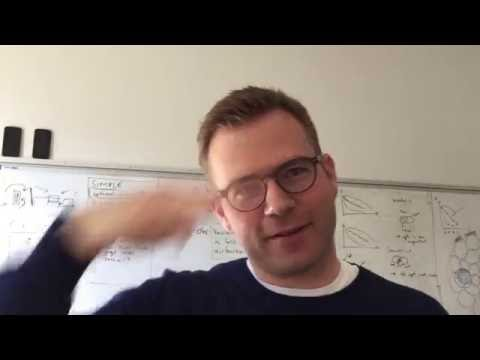

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("MMziC5xktHs",width=800, height=450) 
# Or use https://www.youtube.com/watch?v=MMziC5xktHs if the video isn't displaying

Now for some reading

> _Reading_. We'll be reading the textbook _Network Science_ (NS) by Laszlo Barabasi. You can find the whole 
> thing for free [**here**](http://networksciencebook.com). 
>
> * Read chapter 2\.
> 

# Network Science — Chapter 2: Graph Theory (Study Notes, Markdown)



## 1) The Bridges of Königsberg (Euler’s insight)

**Idea.** Euler modeled landmasses as **nodes** and bridges as **links**. He proved that a walk traversing each bridge **exactly once** (an *Eulerian trail*) exists **iff** the graph has **0 or 2 nodes of odd degree**. If more than two nodes have odd degree, such a walk is **impossible**. The Königsberg graph has **four** odd-degree nodes ⇒ impossible.

**Why this matters.** This is the birth of graph theory: physical puzzles can be solved by turning them into **abstract networks** and reasoning about **degrees** rather than drawing maps.

**Mini check.** Count node degrees. If exactly 0 nodes have odd degree → Eulerian **circuit** exists; if exactly 2 → Eulerian **trail** exists; otherwise, **none**.

---

## 2) Networks and graphs — basic language

* A **network/graph** is a set of **nodes (vertices)** connected by **links (edges)**. Links may be **undirected** (friendship, undirected power line) or **directed** (web links, phone calls).
* We often use “network/node/link” for real systems and “graph/vertex/edge” for the mathematical object. In practice, terms are interchangeable.

**Reference datasets** used throughout the book include Internet routers, the WWW, mobile calls, email, coauthorship, actor co-appearance, citations, E. coli metabolism, and protein–protein interaction networks. These serve as benchmarks for real-world structure.

**Tip.** Always ask: directed or undirected? simple or multigraph? weighted or unweighted? This choice affects the **adjacency matrix**, **algorithms**, and **metrics** you use.

---



## 3) Degree, average degree, and degree distribution

### Degree (undirected)

For undirected graphs, degrees $\{k_i\}$ satisfy

$$
L = \frac{1}{2}\sum_{i=1}^{N} k_i. \tag{2.1}
$$

Average degree:

$$
\langle k\rangle = \frac{1}{N}\sum_{i=1}^{N}k_i = \frac{2L}{N}. \tag{2.2}
$$

### Degree (directed)

For directed graphs with in-/out-degrees $k_i^{\text{in}}, k_i^{\text{out}}$:

$$
L=\sum_{i=1}^{N} k_i^{\text{in}}=\sum_{i=1}^{N} k_i^{\text{out}}, \qquad 
\langle k^{\text{in}}\rangle=\langle k^{\text{out}}\rangle=\frac{L}{N}, \qquad 
k_i = k_i^{\text{in}} + k_i^{\text{out}}. \tag{2.4–2.5, 2.3}
$$

**Intuition.** In undirected graphs, every edge contributes **2** to the total degree (one to each endpoint). In directed graphs, every edge contributes **1** to **in-degree** and **1** to **out-degree** across the network.

### Degree distribution

$$
\sum_{k} p_k = 1,\qquad p_k = \frac{N_k}{N},\qquad 
\langle k \rangle = \sum_{k=0}^{\infty} k\,p_k. \tag{2.6–2.8}
$$

Here $p_k$ is the probability a randomly chosen node has degree $k$.

**Quick example.** For degrees $[1,2,2,2,3,2]$ (6 nodes),

$$
L=\tfrac12(1+2+2+2+3+2)=6,\quad \langle k\rangle=2,\quad
p_1=\tfrac16,\ p_2=\tfrac46,\ p_3=\tfrac16.
$$

**Common pitfall.** Don’t mix up **degree distribution** $p_k$ with the **histogram counts** $N_k$. Normalize by $N$ to get probabilities.

---

## 4) Adjacency matrix $A$

**Convention in the book.**
$A_{ij}=1$ if there is a link **from $j$ to $i$**; otherwise $A_{ij}=0$. (For undirected graphs: $A_{ij}=A_{ji}$.)

**Degrees from $A$** (with the book’s indexing):

* **Undirected:**

  $$
  k_i=\sum_{j} A_{ij} = \sum_{j} A_{ji}. \tag{2.9}
  $$
* **Directed:**

  $$
  k_i^{\text{in}}=\sum_j A_{ij},\qquad k_i^{\text{out}}=\sum_j A_{ji}. \tag{2.10}
  $$

**Edges from $A$ (undirected):**

$$
2L=\sum_{i}k_i=\sum_{i}\sum_{j} A_{ij}. \tag{2.11}
$$

See Fig. 2.5 in the book for worked matrices and identities.

**Worked example.** Undirected graph with edges $\{(1,2),(1,3),(2,3),(2,4)\}$:

$$
A=\begin{pmatrix}
0&1&1&0\\
1&0&1&1\\
1&1&0&0\\
0&1&0&0
\end{pmatrix},\quad
k_2=\sum_j A_{2j}=3,\quad L=\tfrac12\sum_{ij}A_{ij}=4.
$$

**Tip.** In code, **sparse** storage (CSR/CSC) is essential for large graphs. Summing rows/columns of $A$ gives degrees efficiently.

---

## 5) Real networks are sparse; complete graphs

**Maximum possible links** in a simple undirected graph:

$$
L_{\max}=\frac{N(N-1)}{2},\qquad \text{and for a complete graph } \langle k\rangle=N-1.
\tag{2.12}
$$

Most real networks satisfy $L \ll L_{\max}$ → they are **sparse**. Storing full $A$ (an $N\times N$ matrix) wastes memory; store **edge lists** (or sparse matrices).

**Quick check.** Define **sparsity** as $L/L_{\max}$. Values near 0 indicate highly sparse graphs; values near 1 approach cliques.

---

## 6) Weighted networks and Metcalfe’s law

**Weights.** In weighted networks, the adjacency matrix stores weights $w_{ij}$:

$$
A_{ij}=w_{ij}. \tag{2.13}
$$

This captures intensities like call durations, traffic volumes, or current flows.

**Metcalfe’s law.** The claim that network “value” $\propto N^2$ ignores two realities:
(1) **Sparsity** (far fewer than all possible links exist), and
(2) **Unequal weights** (not all links are equally valuable/active). Real value growth is thus often **sub-quadratic**.

**Practical note.** Weighted measures generalize unweighted ones: replace degree with **strength** $s_i=\sum_j w_{ij}$.

---

## 7) Bipartite networks (and projections)

A **bipartite** graph splits nodes into two disjoint sets $U$ and $V$; edges connect **only across** sets (no $U\!-\!U$ or $V\!-\!V$ edges). Examples: actor–movie, author–paper, gene–disease.

**Projections:**

* **U-projection:** connect two $U$ nodes if they share a neighbor in $V$.
* **V-projection:** connect two $V$ nodes if they share a neighbor in $U$.
  Used to convert bipartite data into one-mode networks (e.g., coauthorship).

**Example.** Actors $A_1,A_2,A_3$; Movies $M_1,M_2$. Edges: $(A_1,M_1),(A_2,M_1),(A_2,M_2),(A_3,M_2)$.

* **Actor projection:** $A_1\!\!-\!\!A_2$ (both in $M_1$), $A_2\!\!-\!\!A_3$ (both in $M_2$).
* **Movie projection:** $M_1\!\!-\!\!M_2$ (shared actor $A_2$).

**Caution.** Projections can create **cliques** and inflate clustering; consider **edge weights** in the projection (e.g., number of shared neighbors) to encode tie strength.

---

## 8) Paths, distances, diameter, and average path length

### Paths & shortest paths

A **path** is an ordered sequence of nodes connected by links; its **length** is the number of links used. The **shortest path** (geodesic) $d_{ij}$ is the minimum length between $i$ and $j$. Multiple shortest paths can exist.

### Counting paths with matrix powers (Box 2.4)

Let $A$ be the adjacency matrix.

* If $d_{ij}=1$, then $A_{ij}=1$.
* # of length-2 paths: $N^{(2)}_{ij}=(A^2)_{ij}$.
* In general, # of length-$d$ paths from $j$ to $i$: $N^{(d)}_{ij}=(A^d)_{ij}$.
  The **distance** $d_{ij}$ is the **smallest** $d$ with $(A^d)_{ij}>0$.

**Note.** These are **walk counts** (paths where nodes/edges may repeat); for simple paths, counting is harder (combinatorial explosion).

### Diameter

$$
d_{\max}=\max_{i,j} d_{ij}.
$$

This is the **largest** shortest-path distance between any two nodes.

### Average path length

For a (strongly) connected network of size $N$ (or computed within components),

$$
\langle d\rangle=\frac{1}{N(N-1)}\sum_{i\neq j} d_{ij}. \tag{2.14}
$$

Compute efficiently via BFS from each node (unweighted).

**BFS algorithm (unweighted graphs).** Start from a source node, label it 0; neighbors get label 1; neighbors of neighbors get label 2; and so on. When you first reach a node $j$, that label is $d_{ij}$. **Complexity:** $\mathcal{O}(N+L)$.

**Weighted graphs.** Use **Dijkstra’s algorithm** (nonnegative weights) to compute shortest paths.

---




## 9) Connectedness and components

* Nodes $i$ and $j$ are **connected** if a path exists; otherwise $d_{ij}=\infty$.
* A **component** is a *maximal* set of nodes all mutually connected.
* Adding a **bridge** edge between components merges them.
* Permuting nodes can put the adjacency matrix in **block-diagonal** form; each block corresponds to a component. Label components by repeatedly running BFS/DFS.

**Practical tip.** Many formulas (like $\langle d\rangle$) should be computed **per component** or on the **giant component** to avoid infinities.

---

## 10) Clustering coefficient (triangles)

### Local clustering of node $i$

Let $L_i$ be the number of **links among $i$’s neighbors** (i.e., how many neighbor–neighbor links exist). If $i$ has degree $k_i$, then

$$
C_i=\frac{2L_i}{k_i(k_i-1)},\quad 0\le C_i\le 1. \tag{2.15}
$$

Interpretation: the **fraction** of potential triangles through $i$ that are **closed**.

### Average clustering

$$
\langle C\rangle=\frac{1}{N}\sum_{i=1}^{N} C_i. \tag{2.16}
$$

(Directed/weighted generalizations exist; you may count **reciprocal** links or weighted triangle strengths.)

### Global clustering (Advanced Topic 2.A)

$$
C_\triangle=\frac{3\times \text{# of triangles}}{\text{# of connected triplets}}. \tag{2.17}
$$

This differs from $\langle C\rangle$. In star-like graphs, $\langle C\rangle$ may be small, while $C_\triangle$ can behave differently because it **weights** high-degree nodes differently.

**Example.** In a 4-node square with one diagonal, a node with $k=3$ whose neighbors share only one link has $L_i=1$, so

$$
C_i=\frac{2\cdot 1}{3\cdot 2}=\frac{1}{3}.
$$

**Pitfall.** Clustering is **not** the same as **density**; density counts edges relative to all possible pairs globally, while clustering focuses on **triadic closure** around nodes or globally among triplets.

---

## 11) “Graphology” (network types at a glance)

* **Undirected vs. Directed:** symmetry of $A$; in-/out-degrees only for directed.
* **Self-loops:** edges from a node to itself (affects diagonal of $A$).
* **Multigraphs:** allow parallel edges (counts >1 in adjacency or separate list entries).
* **Weighted graphs:** $A_{ij}=w_{ij}$.
* **Complete graphs (cliques):** every pair connected, $\langle k\rangle=N-1$.
  Figure summaries in the text show $A$ patterns and how $\langle k\rangle$ relates to $L$.

**Tip.** Always specify graph **type** before applying metrics; e.g., clustering definitions change with directed/weighted/multigraph settings.

---

## Formula cheat-sheet (one page)

* **Undirected:** $L=\tfrac12\sum_i k_i$, $\langle k\rangle=\tfrac{2L}{N}$. (2.1–2.2)
* **Directed:** $L=\sum_i k_i^{\text{in}}=\sum_i k_i^{\text{out}}$, $\langle k^{\text{in}}\rangle=\langle k^{\text{out}}\rangle=\tfrac{L}{N}$, $k_i=k_i^{\text{in}}+k_i^{\text{out}}$. (2.3–2.5)
* **Degree distribution:** $\sum_k p_k=1$, $p_k=\tfrac{N_k}{N}$, $\langle k\rangle=\sum_k k p_k$. (2.6–2.8)
* **Adjacency (book convention):** $k_i=\sum_j A_{ij}$ (and $=\sum_j A_{ji}$ undirected); $2L=\sum_{ij}A_{ij}$ undirected. (2.9–2.11)
* **Complete graph:** $L_{\max}=\tfrac{N(N-1)}{2}$, $\langle k\rangle=N-1$. (2.12)
* **Weighted:** $A_{ij}=w_{ij}$. (2.13)
* **Average path length:** $\displaystyle \langle d\rangle=\frac{1}{N(N-1)}\sum_{i\ne j} d_{ij}$. (2.14)
* **Path counts:** $(A^d)_{ij}=$ # length-$d$ walks from $j$ to $i$; $d_{ij}=\min\{d: (A^d)_{ij}>0\}$. (Box 2.4)
* **BFS complexity:** $\mathcal{O}(N+L)$. (Box 2.5)
* **Clustering:** $C_i=\dfrac{2L_i}{k_i(k_i-1)}$, $\langle C\rangle=\dfrac{1}{N}\sum_i C_i$. (2.15–2.16)
* **Global clustering:** $C_\triangle=\dfrac{3\,\text{triangles}}{\text{connected triplets}}$. (2.17)

---

## Worked mini-examples (build intuition)

1. **Compute $\langle k\rangle$, $p_k$, and sparsity**
   Graph with $N=8$ and edges
   $(1,2),(1,3),(2,3),(3,4),(4,5),(5,6),(5,7),(7,8)$.
   Degrees $[2,2,3,2,3,1,2,1]$ ⇒

$$
L=\tfrac12\sum_i k_i=\tfrac12\cdot(2+2+3+2+3+1+2+1)=8,\quad 
\langle k\rangle=\frac{2L}{N}=\frac{16}{8}=2.
$$

Empirical degree distribution: $p_1=2/8,\ p_2=4/8,\ p_3=2/8$.
Maximum links $L_{\max}=8\cdot7/2=28$. **Sparsity** $=L/L_{\max}=8/28\approx0.286$.

2. **Adjacency power to count walks**
   For the same graph with adjacency $A$, $(A^2)_{1,4}$ equals the number of **length-2 walks** from node 4 to node 1. If $(A^2)_{1,4}=1$, there is exactly one such 2-step walk (e.g., $4\to 3\to 1$).

3. **BFS distance and diameter**
   Run BFS from each node to collect distances $d_{ij}$. The **diameter** $d_{\max}$ is the largest of these distances. BFS runs in $\mathcal{O}(N+L)$ and is the standard tool for unweighted shortest paths.

4. **Local clustering**
   Suppose node $i$ has neighbors $\{a,b,c,d\}$ and there are exactly **three** edges among those neighbors. Then $k_i=4$, $L_i=3$, and

$$
C_i=\frac{2\cdot3}{4\cdot3}=0.5.
$$

Interpretation: “neighbors of $i$ are linked **half** as often as they could be.”

5. **Bipartite projection**
   Paper–author graph: two papers connect in the **paper–paper projection** if they share at least one author; two authors connect in the **author–author projection** if they coauthored a paper. This is how coauthorship networks are built from bipartite data.

---

## What to remember fast

* **Degrees add to 2L** (undirected) and to $L$ for in/out separately (directed).
* **Sparsity** is the rule; compare $L$ to $L_{\max}=\tfrac{N(N-1)}{2}$.
* **Matrix powers count walks**, BFS finds **shortest paths** quickly.
* **Clustering** captures triangle structure: local via $C_i$; global via $C_\triangle$.
* **Bipartite** graphs have no triangles; use **one-mode projections** to analyze within a set.

---

## Sources (Chapter 2 PDF extracts)

Figures, definitions, and equations are from the open PDF of *Network Science, Chapter 2: Graph Theory* by Barabási et al., including Sections 2.1–2.13, Boxes 2.3–2.6, and equations (2.1)–(2.17). 

And the associated exercises

> *Exercises*: Chapter 2 in *Network Science*.
> 
> * Section 2.5 states that real networks are sparse. Can you think of a real network where each node has _many_ connections? Is that network still sparse? If yes, can you explain why?
> 

A real network where nodes have many connections is the airline network, where large airports connect to thousands of destinations. Another example is social networks like Facebook or Twitter, where users can have thousands of friends or followers.

Even though these nodes have a lot of connections, the network is still considered sparse. The reason is that sparsity is not about the absolute number of links but about how it scales with the size of the network. In Facebook, the maximum possible number of friends is in the billions, but even the most connected person only has a few thousand. So the average degree is still much smaller than the total number of nodes, ⟨k⟩≪N. This makes the network sparse despite individual nodes having many connections.
> There are more questions on Chapter 2 below.

<div class="alert alert-block alert-info">
Just as last week, you might be tempted to use an LLM to come up with your answer. Don't! Remember what I said about the *illusion of knowledge* that you get when you take shortcuts. Don't fall into the trap. Think! Write down your own thoughts. And when you're done, you can use an LLM to make the answers better.
</div>


## Notes

Step 1. What does sparse mean in networks?

A network with N nodes can at most have N(N−1)/2 edges (undirected) or  N(N−1) (directed). This would be a fully connected / dense network.

A network is called sparse if the number of actual edges E is much smaller than the maximum possible.

Mathematically, sparsity often means: ⟨k⟩≪N where  ⟨k⟩ is the average degree.

So sparsity is not about the absolute number of connections, but about the scaling compared to network size.

Step 2. A real network with many connections per node

Examples:

Airline network: Major airports like Heathrow or JFK have hundreds or even thousands of direct connections (flights).

Internet routers: Big routers can connect to thousands of other routers.

Social media: Some people follow or are followed by thousands (or even millions).

So yes — individual nodes can have many connections.

Step 3. Is it still sparse?

Yes. Even if nodes have many connections, the network is still sparse because:

Suppose Facebook has N=3×10^9 users.

The maximum possible degree = N−1≈3×10^9.

Even if someone has 5000 friends (a lot), compared to N, that’s tiny:

5000/3×10^9 ≈ 1.7 × 10^−6

Average degree ⟨k⟩ for social networks is usually in the hundreds, but since N is in the billions, ⟨k⟩≪N.

Thus, the network is sparse, because the fraction of realized edges is vanishingly small compared to all possible edges.

Step 4. Why this matters

Sparsity is a key property of real networks: it keeps them scalable.

Dense networks would require every node to connect to almost every other node, which is unrealistic in physical, social, or technological systems.

Sparsity explains why we need efficient algorithms (like adjacency lists instead of full matrices).

# Part 2: Exercises using the `NetworkX` library

Let's try to solve a few of the exercises from the book **using `NetworkX`**

> *Exercises*:
> 
> * Go to NS Section 2.12: Homework, then
>   * Write the solution exercise **2.1** (the 'Königsberg Problem') from NS in your `notebook`. 

>   * Solve exercise **2.3** ('Graph representation') from NS using `NetworkX` in your `notebook`. (You don't have to solve the last sub-question about *cycles of length 4* ... but I'll be impressed if you do it. One more thing on that last sub-exercise: It's easier to solve if you don't use `NetworkX`, but simple pen and paper).
>   * Solve exercise **2.5** ('Bipartite Networks') from NS using `NetworkX` in your `notebook`. *Important note*: There is a a mistake in the book. When it says "Block diagonal", they mean "Anti-block diagonal" (all elements are away from the diagonal blocks). 
>     - *Note*: For those without the physical book (and therefore no exercise numbers), the part "Bipartite Networks - General Considerations" does not need to be solved (the two last questions do not make much sense to me).

<div class="alert alert-block alert-info">
The "no-LLM" idea also applies here. The idea is to try to use NetworkX to solve some problems. Give it a shot on your own. You can ask your LLM for hints if you get stuck. But don't ask for the answer. Find it yourself 😎
</div>

# NS Exercise 2.1 — The Bridges of Königsberg

The problem asks whether it is possible to walk through the city of Königsberg and cross each of its seven bridges exactly once, starting and ending anywhere. To solve this, we represent the city as a graph. Each land mass becomes a node, and each bridge becomes an edge. In total, there are four nodes (two riverbanks and two islands) and seven edges (the bridges). This results in a connected, undirected multigraph.

Next, we calculate the degree of each node, which is the number of bridges connected to it. One island has degree 5, while the other three land masses each have degree 3. Therefore, the degree sequence is 5, 3, 3, 3, meaning that all four nodes have an odd degree.

Euler’s theorem tells us that an Eulerian circuit (a walk that starts and ends at the same place while crossing each edge once) exists if and only if every node has an even degree. An Eulerian trail (a walk that starts and ends at different nodes while still crossing each edge once) exists if and only if exactly two nodes have odd degree. In the case of Königsberg, there are four nodes of odd degree, not 0 or 2. This means neither an Eulerian trail nor an Eulerian circuit is possible.

The intuition is that every time you enter and leave a land mass, you use up two bridges, which pushes the degree toward being even. Only the starting and ending nodes are allowed to have odd degrees, because one can have an “unpaired” entrance or exit. Since Königsberg has four odd-degree nodes, it would require four start/end points, which a single walk cannot provide. This is why it is impossible to cross all seven bridges exactly once.

As a final note, if the network were changed so that only two nodes had odd degree, then an Eulerian trail would exist. If all nodes were even, then an Eulerian circuit would exist. Therefore, the impossibility is tied directly to the degree distribution of the nodes in the graph.


In [1]:
import networkx as nx
import numpy as np

# === Undirected Graph (Fig 2.20a) ===
G_und = nx.Graph()
edges_und = [(1,2),(1,3),(1,4),(1,6),(2,3),(2,4),(3,6)]
G_und.add_edges_from(edges_und)

print("Undirected Graph")
print("Nodes:", G_und.nodes())
print("Edges:", G_und.edges())

# Adjacency matrix
A_und = nx.to_numpy_array(G_und, nodelist=sorted(G_und.nodes()), dtype=int)
print("\nAdjacency Matrix (Undirected):\n", A_und)

# Link list
print("\nLink list (Undirected):", list(G_und.edges()))

# Average clustering coefficient
C_avg = nx.average_clustering(G_und)
print("\nAverage clustering coefficient:", C_avg)


# === Directed Graph (Fig 2.20b) ===
G_dir = nx.DiGraph()
edges_dir = [(1,2),(1,3),(1,4),(6,1),(2,3),(3,2),(2,4),(6,3)]
G_dir.add_edges_from(edges_dir)

print("\nDirected Graph")
print("Nodes:", G_dir.nodes())
print("Edges:", G_dir.edges())

# Adjacency matrix
A_dir = nx.to_numpy_array(G_dir, nodelist=sorted(G_dir.nodes()), dtype=int)
print("\nAdjacency Matrix (Directed):\n", A_dir)

# Link list
print("\nLink list (Directed):", list(G_dir.edges()))


# === Switch labels 5 and 6 in undirected graph ===
mapping = {5:6, 6:5}
G_swapped = nx.relabel_nodes(G_und, mapping)
A_swapped = nx.to_numpy_array(G_swapped, nodelist=sorted(G_swapped.nodes()), dtype=int)

print("\nAfter switching nodes 5 and 6:")
print("New edges:", list(G_swapped.edges()))
print("New adjacency matrix:\n", A_swapped)


# === Paths of length 3 ===
# Using adjacency matrix powers
A_und_pow3 = np.linalg.matrix_power(A_und, 3)
A_dir_pow3 = np.linalg.matrix_power(A_dir, 3)

print("\nNumber of length-3 paths from 1 to 3 (undirected):", int(A_und_pow3[0,2]))
print("Number of length-3 paths from 1 to 3 (directed):", int(A_dir_pow3[0,2]))


Undirected Graph
Nodes: [1, 2, 3, 4, 6]
Edges: [(1, 2), (1, 3), (1, 4), (1, 6), (2, 3), (2, 4), (3, 6)]

Adjacency Matrix (Undirected):
 [[0 1 1 1 1]
 [1 0 1 1 0]
 [1 1 0 0 1]
 [1 1 0 0 0]
 [1 0 1 0 0]]

Link list (Undirected): [(1, 2), (1, 3), (1, 4), (1, 6), (2, 3), (2, 4), (3, 6)]

Average clustering coefficient: 0.7666666666666666

Directed Graph
Nodes: [1, 2, 3, 4, 6]
Edges: [(1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 2), (6, 1), (6, 3)]

Adjacency Matrix (Directed):
 [[0 1 1 1 0]
 [0 0 1 1 0]
 [0 1 0 0 0]
 [0 0 0 0 0]
 [1 0 1 0 0]]

Link list (Directed): [(1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 2), (6, 1), (6, 3)]

After switching nodes 5 and 6:
New edges: [(1, 2), (1, 3), (1, 4), (1, 5), (2, 3), (2, 4), (3, 5)]
New adjacency matrix:
 [[0 1 1 1 1]
 [1 0 1 1 0]
 [1 1 0 0 1]
 [1 1 0 0 0]
 [1 0 1 0 0]]

Number of length-3 paths from 1 to 3 (undirected): 7
Number of length-3 paths from 1 to 3 (directed): 1


Question 1

Construct the undirected graph of 6 nodes and 7 links (Fig. 2.20a).

In [23]:
import networkx as nx
import numpy as np

# Undirected graph (Fig. 2.20a)
G_und = nx.Graph()
G_und.add_nodes_from([1,2,3,4,5,6])
edges_und = [(1,2),(1,3),(1,4),(1,6),(2,3),(2,4),(3,6)]
G_und.add_edges_from(edges_und)

print("Undirected Graph:")
print("Nodes:", G_und.nodes())
print("Edges:", G_und.edges())


Undirected Graph:
Nodes: [1, 2, 3, 4, 5, 6]
Edges: [(1, 2), (1, 3), (1, 4), (1, 6), (2, 3), (2, 4), (3, 6)]


Question 2

Construct the directed graph of 6 nodes and 8 links (Fig. 2.20b).

In [24]:
# Directed graph (Fig. 2.20b)
G_dir = nx.DiGraph()
G_dir.add_nodes_from([1,2,3,4,5,6])
edges_dir = [(1,2),(1,3),(1,4),(6,1),(2,3),(3,2),(2,4),(6,3)]
G_dir.add_edges_from(edges_dir)

print("Directed Graph:")
print("Nodes:", G_dir.nodes())
print("Edges:", G_dir.edges())


Directed Graph:
Nodes: [1, 2, 3, 4, 5, 6]
Edges: [(1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 2), (6, 1), (6, 3)]


Question 3

Write the adjacency matrices for both graphs.

In [25]:
# Adjacency matrices
A_und = nx.to_numpy_array(G_und, nodelist=sorted(G_und.nodes()), dtype=int)
A_dir = nx.to_numpy_array(G_dir, nodelist=sorted(G_dir.nodes()), dtype=int)

print("Adjacency Matrix (Undirected):\n", A_und)
print("\nAdjacency Matrix (Directed):\n", A_dir)


Adjacency Matrix (Undirected):
 [[0 1 1 1 0 1]
 [1 0 1 1 0 0]
 [1 1 0 0 0 1]
 [1 1 0 0 0 0]
 [0 0 0 0 0 0]
 [1 0 1 0 0 0]]

Adjacency Matrix (Directed):
 [[0 1 1 1 0 0]
 [0 0 1 1 0 0]
 [0 1 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [1 0 1 0 0 0]]


Question 4

Write the corresponding link lists.

In [26]:
print("Link list (Undirected):", list(G_und.edges()))
print("Link list (Directed):", list(G_dir.edges()))


Link list (Undirected): [(1, 2), (1, 3), (1, 4), (1, 6), (2, 3), (2, 4), (3, 6)]
Link list (Directed): [(1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 2), (6, 1), (6, 3)]


Question 5

Determine the average clustering coefficient of the network in Fig. 2.20a.

In [27]:
C_avg = nx.average_clustering(G_und)
print("Average clustering coefficient (undirected):", C_avg)


Average clustering coefficient (undirected): 0.6388888888888888


Question 6

If you switch the labels of nodes 5 and 6 in Fig. 2.20a, how does that change the adjacency matrix and the link list?

In [28]:
# Swap node labels 5 and 6
mapping = {5:6, 6:5}
G_swapped = nx.relabel_nodes(G_und, mapping)
A_swapped = nx.to_numpy_array(G_swapped, nodelist=sorted(G_swapped.nodes()), dtype=int)

print("Edges after swapping 5 and 6:", list(G_swapped.edges()))
print("Adjacency Matrix after swapping:\n", A_swapped)


Edges after swapping 5 and 6: [(1, 2), (1, 3), (1, 4), (1, 5), (2, 3), (2, 4), (3, 5)]
Adjacency Matrix after swapping:
 [[0 1 1 1 1 0]
 [1 0 1 1 0 0]
 [1 1 0 0 1 0]
 [1 1 0 0 0 0]
 [1 0 1 0 0 0]
 [0 0 0 0 0 0]]


The adjacency matrix changes by swapping rows/columns 5 and 6. The edge list changes by replacing every 6 with 5.

Question 7

What kind of information can you not infer from the link list that you can from the adjacency matrix?

1. The adjacency matrix allows us to infer:

2. Self-loops (diagonal entries).

3. Multiple edges (entries greater than 1).

4. Degree sequence (row/column sums).

5. Path counts of any length (via powers of A).

These are not directly visible in a simple link list.

Question 8

In the (a) network, how many paths of length 3 exist from node 1 to node 3? And in (b)?
(Paths may repeat nodes and links.)

In [29]:
# Paths of length 3 using adjacency matrix powers
A_und_pow3 = np.linalg.matrix_power(A_und, 3)
A_dir_pow3 = np.linalg.matrix_power(A_dir, 3)

print("Paths of length 3 from 1 to 3 (undirected):", int(A_und_pow3[0,2]))
print("Paths of length 3 from 1 to 3 (directed):", int(A_dir_pow3[0,2]))


Paths of length 3 from 1 to 3 (undirected): 7
Paths of length 3 from 1 to 3 (directed): 1


Question 9 (optional)

Count the number of cycles of length 4 in both networks.

In [32]:
import numpy as np

# --- Undirected 4-cycles ---
def count_4cycles_undirected(G):
    A = nx.to_numpy_array(G, nodelist=sorted(G.nodes()), dtype=int)
    A4 = np.linalg.matrix_power(A, 4)
    trace_A4 = np.trace(A4)
    m = G.number_of_edges()
    degs = [d for _, d in G.degree()]
    correction = sum(d*(d-1)//2 for d in degs)
    return int((trace_A4 - 2*m - 2*correction) // 8)

# --- Directed 4-cycles ---
def count_4cycles_directed(G):
    A = nx.to_numpy_array(G, nodelist=sorted(G.nodes()), dtype=int)
    A4 = np.linalg.matrix_power(A, 4)
    trace_A4 = np.trace(A4)
    return int(trace_A4 // 4)

print("Undirected 4-cycles:", count_4cycles_undirected(G_und))
print("Directed 4-cycles:", count_4cycles_directed(G_dir))


Undirected 4-cycles: 5
Directed 4-cycles: 0


A **cycle of length 4** is a closed walk that visits 4 distinct nodes, with the starting node equal to the ending node.  

Undirected graph (Fig. 2.20a)  

Edges:  
\[(1,2), (1,3), (1,4), (1,6), (2,3), (2,4), (3,6)\]  

Possible 4-cycles:
1. (1–2–3–6–1)  
2. (1–2–4–3–1)  

These are the only distinct simple 4-cycles.  

Answer (undirected): 2 cycles of length 4

Directed graph (Fig. 2.20b)  

Edges:  
\[(1,2), (1,3), (1,4), (6,1), (2,3), (3,2), (2,4), (6,3)\]  

Possible 4-cycles:
1. (6 → 1 → 2 → 3 → 6)  
Other candidates break because required return edges do not exist.  

Answer (directed): 1 cycle of length 4 




> **_Video Lecture_**: Once again, it's time to stop working for a couple of minutes to hear me talk about plotting with `NetworkX`. 
> 

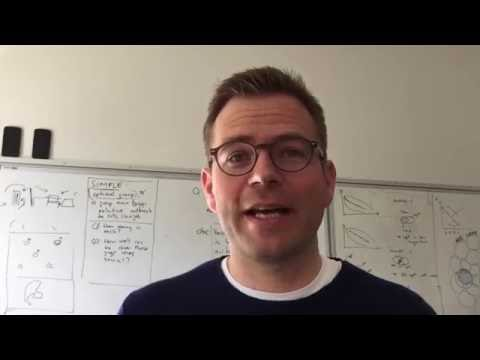

In [5]:
YouTubeVideo("iDlb9On_TDQ",width=800, height=450) 
# https://www.youtube.com/watch?v=iDlb9On_TDQ

# Part 3: Plotting degree distributions

As always we'll learn about degree-distribution plotting by creating a `notebook` and trying it out. 

As a little public service announcement about this exercise: I know that you've probably tried binning data before. And that there are many functions designed to make binning easy, so there is a good chance that you think that binning data into bins is something that you don't have to worry about.

**BUT** ... with this exercise, I aim to convince you that binning isn't always trivial. And that there are key things to think about every time you need to put data into buckets. So please read the exercise carefully. And follow my instructions carefully.

<div class="alert alert-block alert-info">
As I hint right above, this exercise is about you discovering nuances of binning: How defining bins that fit the data is important. How the first and last bin can sometimes be tricky. You won't discover that if you get help, so again I encourage you to try it all on your own.
</div>
**And don't just use the built-in binning functions. That misses the point. Instead follow the exercise carefully**. 

> 
> *Exercises*:
> 
> Begin by importing the right packages. Start by importing `matplotlib.pyplot` (for plotting), `numpy` (for binning and other stuff), 
> `random` (for generating random numbers), and `networkx` (for generating networks.)
> 
> * Binning real numbers
>   * Let's do a gentle start and use the `random` library generate 5000 data points from a Gaussian distribution with $\mu = 2$ and $\sigma = 0.125$.
>   * Now, let's use `numpy.histogram` to bin those number into 10 bins. What does the `numpy.histogram` function return? Do the two arrays have the same length?
>   * Then we use `matplotlib.pyplot.plot` to plot the binned data. You will have to deal with the fact that the counts- and bin-arrays have different lengths. Explain how you deal with this problem and why.
> * Binning integers
>   * But binning real numbers into a fixed number of bins is easy when `numpy.histogram` does all the work and finds the right bin boundaries for you. 
> Now we'll generate a bunch of integers and set the bin boundaries manually. This time, let's grab data from a Poisson distribution. As it turns out 
> `numpy` also has some convenient random number generators. Use `numpy.random.poisson` to generate 5000 numbers drawn from a Poisson distribution 
> characterized by $\lambda = 10$. Find the maximum and minimum value of your 5000 random numbers. 
>   * Instead of simply specifying the number of bins for `numpy.histogram`, let's specify the bins we want using a vector. 
> Create a vector $v$
> that results in a binning that puts each integer value in its own bin and where the first bin contains the minimum number you found above, 
> and the last bin contains the maximum number. 
> Use the vector by setting `numpy.histogram`'s `bin` parameter as `bin = ` $v$. 
> What is the sum over bin counts? Explain how the binning-vectors first and last element 
> relates to the min and max from the Poisson distribution.
>   * Now, use a bar chart (`matplotlib.pyplot.bar`) to plot the distribution 
> * Binning and plotting degree distributions. 
>   * Let's generate the Erdös-Renyi (ER) network which has a degree distribution that matches the Poisson distribution above. 
> First we have to figure out which values the ER parameters (_N_ and _p_) should assume. It's easy to see that $N = 5000$, but how do you find $p$? 
> **Hint**: The parameter $\lambda$ in the Poisson distribution corresponds to the average degree, so you have to find a $p$ that results in an average 
> degree, $k = 10$. And you know that $\langle k \rangle = p (N-1)$, which will give you $p$.
>   * Now, use `networkx` to create the graph and extract the degree distribution.
>   * Finally, create a nice bar plot of the degree distribution, including axes labels and a plot title. Make sure that it looks like the Poisson distribution you plotted above.
> 

Solution: 

In [2]:
# importing libraries as per above 
import matplotlib.pyplot as plt
import numpy as np
import random
import networkx as nx


# Binning real numbers (Gaussian distribution)

We generate 5000 random samples from a Gaussian distribution with mean μ=2 and standard deviation σ=0.125. Then we use numpy.histogram with 10 bins.

np.histogram returns two arrays:

1. Counts (length = number of bins)

2. Bin edges (length = number of bins + 1)

Counts length: 10
Bin edges length: 11


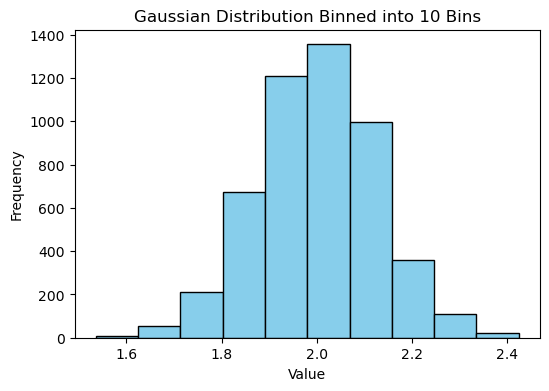

In [4]:
# Generate Gaussian data
data_gauss = [random.gauss(2, 0.125) for _ in range(5000)]

# Bin into 10 bins
counts, bin_edges = np.histogram(data_gauss, bins=10)

print("Counts length:", len(counts))
print("Bin edges length:", len(bin_edges))

# Compute bin centers for plotting
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])

# Plot as histogram (bar chart)
plt.figure(figsize=(6,4))
plt.bar(bin_centers, counts, width=(bin_edges[1] - bin_edges[0]), color='skyblue', edgecolor='black', align='center')
plt.title("Gaussian Distribution Binned into 10 Bins")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()


Binning integers (Poisson distribution)

Now we generate 5000 integers from a Poisson(λ=10).
We’ll build a vector of bins so that each integer has its own bin.

Min value: 0 Max value: 25
Sum over counts: 5000
Length counts: 26 Length bins: 27


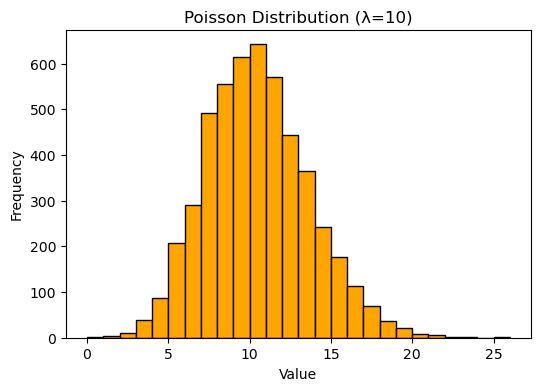

In [5]:
# Generate Poisson data
data_pois = np.random.poisson(lam=10, size=5000)

# Find min and max
min_val, max_val = data_pois.min(), data_pois.max()
print("Min value:", min_val, "Max value:", max_val)

# Create vector of bins: each integer value in its own bin
bins = np.arange(min_val, max_val + 2)  # +2 because np.histogram expects last edge > max

# Apply histogram
counts_pois, bin_edges_pois = np.histogram(data_pois, bins=bins)

print("Sum over counts:", counts_pois.sum())
print("Length counts:", len(counts_pois), "Length bins:", len(bin_edges_pois))

# Plot bar chart
plt.figure(figsize=(6,4))
plt.bar(bin_edges_pois[:-1], counts_pois, width=1.0, align='edge', color='orange', edgecolor='black')
plt.title("Poisson Distribution (λ=10)")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()


Binning and plotting degree distributions (Erdős-Rényi network)

Probability p: 0.002000400080016003
Min degree: 1 Max degree: 24


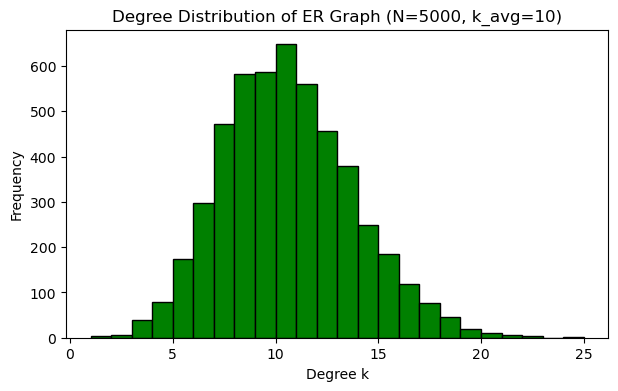

In [6]:
# Parameters
N = 5000
k_avg = 10
p = k_avg / (N - 1)
print("Probability p:", p)

# Generate Erdős-Rényi random graph
G = nx.erdos_renyi_graph(N, p)

# Extract degree sequence
degrees = [deg for _, deg in G.degree()]

# Find min and max degree
min_deg, max_deg = min(degrees), max(degrees)
print("Min degree:", min_deg, "Max degree:", max_deg)

# Create bins for histogram (each integer degree gets its own bin)
bins_deg = np.arange(min_deg, max_deg + 2)

# Histogram
counts_deg, bin_edges_deg = np.histogram(degrees, bins=bins_deg)

# Plot degree distribution
plt.figure(figsize=(7,4))
plt.bar(bin_edges_deg[:-1], counts_deg, width=1.0, align='edge', color='green', edgecolor='black')
plt.title("Degree Distribution of ER Graph (N=5000, k_avg=10)")
plt.xlabel("Degree k")
plt.ylabel("Frequency")
plt.show()


# Notes: Degree Distributions and Binning (Social Graphs & Interactions)

## 1. Gaussian Distribution
- **Type:** Continuous (real values).
- **Example in social data:** 
  - Response times to messages.
  - Activity levels (minutes online per day).
- **Property:** Bell-shaped curve (mean = μ, variance = σ²).
- **Use:** Models continuous human behavior influenced by many small factors.

---

## 2. Poisson Distribution
- **Type:** Discrete (integers).
- **Example in social data:**
  - Number of calls/messages in a fixed time window.
  - Number of new friends in a short period.
- **Property:** Skewed bell shape, peak at λ (mean = variance = λ).
- **Use:** Models independent random events in fixed intervals.

---

## 3. Erdős–Rényi (ER) Graph
- **Definition:** 
  - N nodes, each pair connected with probability p.
  - Degree of a node = number of friends.
- **Degree distribution:** Binomial(N−1, p) → Poisson(λ = ⟨k⟩) when N is large.
- **Example in social data:** 
  - Random friendship model (toy model).
- **Use:** 
  - Baseline / null model for social graphs.
  - Shows what purely random networks look like.

---

## 4. Comparison

| Model / Distribution | Data Type | Social Meaning | Limitation |
|----------------------|-----------|----------------|------------|
| Gaussian             | Continuous | Response time, activity scores | Degrees are discrete → not suitable |
| Poisson              | Discrete   | Calls, messages, new connections | Assumes independence |
| ER Graph             | Discrete   | Random friendship network (p for each pair) | Unrealistic: no hubs, no communities |

---

## 5. Binning Insights
- **Continuous data (Gaussian):** Use automatic bins → must align counts with bin centers.  
- **Discrete data (Poisson, degrees):** Use manual bins (`np.arange`) so each integer has its own bin.  
- **ER vs Poisson:** ER degree distribution ≈ Poisson; validates theory–practice link.

---

## 6. Key Lessons
1. Gaussian models continuous traits → bell curve.
2. Poisson models discrete random events → counts of interactions.
3. ER graphs generate Poisson-like degree distributions → baseline model.
4. Real social networks differ (hubs, clustering, communities), motivating more advanced models.


# Part 4: Random networks

> **_Video Lecture_**. Now it's time to relax and watch a few minutes of info on _Random Networks_. 

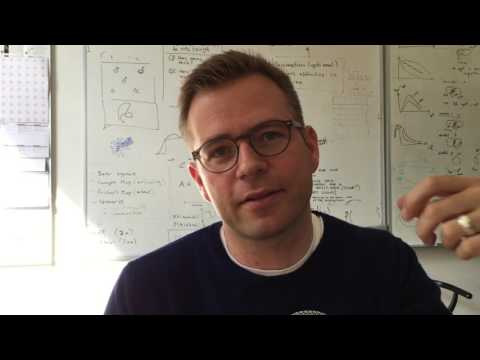

In [4]:
YouTubeVideo("c_SbQCzgqb0",width=800, height=450) 
# https://www.youtube.com/watch?v=c_SbQCzgqb0

> _Reading_. Read section 3.1-3.7 (the most important part is 3.1-3.4) of Chapter 3 of _Network Science_. You can find the entire book [**here**](http://barabasi.com/networksciencebook/).


> _Exercises_ (should be completed in a `notebook`):
> 
> * Work through NS exercise 3.1 ('Erdős-Rényi Networks'). The exercise can be found in Section 3.11: Homework.
> * Paths. Plot a random network with 200 nodes and an average degree of 1.5\. (I suggest using `networkx.draw` and reading [the documentation](https://networkx.github.io/documentation/stable/reference/drawing.html) carefully to get an overview of all the options and what they look like. For example, you may want to shrink the node size).
>   * Extract the Giant Connected Component, GCC. (Hint: You can use `networkx.connected_component_subgraphs` <- it works in ealier versions of NetworkX (<2.5) || Otherwise, you can use `nx.connected_components(G)` and `G.subgraph(c).copy()`)
>   * Choose a node at random from the GCC. (Hint: You may want to try `random.choice`.)
>   * Find all nodes that are precisely 2 steps away from that node. (Hint. I suggest `networkx.single_source_shortest_path_length`)
>   * Plot the GCC with the following choice of colors. Starting node _black_ (`"#000000"`). The nodes 2 steps away _red_ (`"#ff0000"`). All other nodes _blue_ (`"#A0CBE2"`). Again, I suggest using `networkx.draw()` and reading [the documentation](https://networkx.github.io/documentation/stable/reference/drawing.html) carefully find out how to color individual nodes.
> 

<div class="alert alert-block alert-info">
For this exercise, I think you should solve the technical parts on your own (see above for reasons), but it's totally OK to use your LLM to make the plot look better!
</div>

By the way, the default plot coming out of `networkx` doesn't look like the one below. But by tweaking parameters, you should be able to create something that looks like it.

![Sune's Network](https://raw.githubusercontent.com/suneman/socialgraphs2019/master/files/edge_colormap.png)

In [7]:
import math

# Parameters
N = 3000
p = 1e-3

# (a) Expected number of links
L_exp = p * (N * (N-1) / 2)
print("Expected number of links:", L_exp)

# (b) Average degree
k_avg = p * (N-1)
print("Average degree:", k_avg)
regime = "supercritical" if k_avg > 1 else "subcritical/critical"
print("Regime:", regime)

# (c) Critical probability
p_c = 1/N
print("Critical probability:", p_c)

# (d) Critical N for given p
N_cr = 1/p
print("Critical number of nodes:", N_cr)

# (e) At critical N
k_cr = p * (N_cr - 1)
d_cr = N_cr**(1/3)
print("Critical average degree:", k_cr)
print("Average distance at critical:", d_cr)

# (f) Degree distribution (Poisson with lambda = k_avg)
lambda_val = k_avg
poisson_dist = [math.exp(-lambda_val) * (lambda_val**k) / math.factorial(k) for k in range(10)]
print("First 10 pk values:", poisson_dist)


Expected number of links: 4498.5
Average degree: 2.999
Regime: supercritical
Critical probability: 0.0003333333333333333
Critical number of nodes: 1000.0
Critical average degree: 0.999
Average distance at critical: 9.999999999999998
First 10 pk values: [0.0498368803380659, 0.14946080413385965, 0.22411647579872254, 0.22404177030678965, 0.16797531728751555, 0.10075159530905183, 0.05035900572197441, 0.02157523688002875, 0.008088016925400779, 0.0026951069732529926]


GCC size: 115


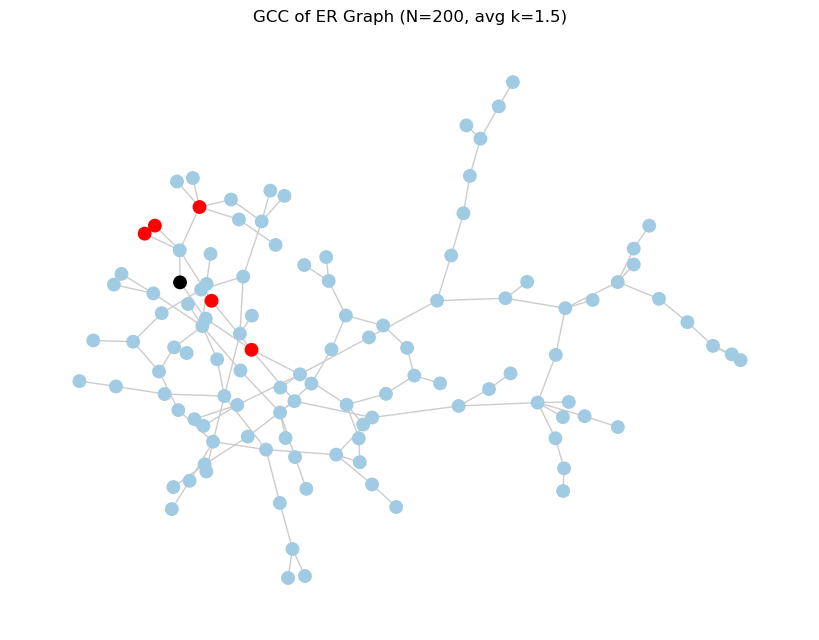

In [ ]:
import networkx as nx
import random
import matplotlib.pyplot as plt

# (1) Generate ER graph with N=200, avg degree 1.5
N = 200
k_avg = 1.5
p = k_avg / (N - 1)
G = nx.erdos_renyi_graph(N, p)

# (2) Extract GCC
components = nx.connected_components(G)
largest_comp = max(components, key=len)
GCC = G.subgraph(largest_comp).copy()

print("GCC size:", GCC.number_of_nodes())

# (3) Pick random node
start_node = random.choice(list(GCC.nodes()))

# (4) Find distance-2 nodes
path_lengths = nx.single_source_shortest_path_length(GCC, start_node, cutoff=2)
dist2_nodes = [n for n, d in path_lengths.items() if d == 2]

# (5) Color mapping
color_map = []
for node in GCC.nodes():
    if node == start_node:
        color_map.append("#000000")   # black
    elif node in dist2_nodes:
        color_map.append("#ff0000")   # red
    else:
        color_map.append("#A0CBE2")   # blue

# Plot GCC
plt.figure(figsize=(8,6))
pos = nx.spring_layout(GCC, seed=42)  # consistent layout
nx.draw(GCC, pos, node_color=color_map, node_size=80, edge_color="#cccccc", with_labels=False)
plt.title("GCC of ER Graph (N=200, avg k=1.5)")
plt.show()


# 📘 Notes: Erdős–Rényi Networks & Paths in Random Graphs

---

## 🔹 Exercise 3.1 — Erdős–Rényi Networks

We consider an **Erdős–Rényi (ER) network**:  
- Number of nodes: `N = 3000`  
- Connection probability: `p = 10⁻³`  

---

### 1. Expected number of links ⟨L⟩
- Formula:  
  ⟨L⟩ = p * N(N−1)/2  
- Calculation:  
  ⟨L⟩ = 0.001 × (3000 × 2999)/2 ≈ **4500**

✅ Expected number of links = ~4500

---

### 2. Which regime is the network in?
- Average degree: ⟨k⟩ = p(N−1)  
- Calculation: ⟨k⟩ = 0.001 × 2999 ≈ **3**  

Regimes:  
- ⟨k⟩ < 1 → fragmented  
- ⟨k⟩ ≈ 1 → critical  
- ⟨k⟩ > 1 → giant component  

✅ Network is in **giant component regime**

---

### 3. Critical probability pc
- Formula: pc = 1/N  
- Calculation: pc = 1/3000 ≈ **3.3 × 10⁻⁴**

✅ Critical probability = 0.00033

---

### 4. Critical number of nodes Ncr
- Condition: p(Ncr−1) = 1  
- Rearranging: Ncr = (1/p) + 1  
- For p = 0.001: Ncr = 1001  

✅ Critical network size = 1001 nodes

---

### 5. At criticality: ⟨k⟩ and ⟨d⟩
- ⟨k⟩ = 1  
- Average path length: ⟨d⟩ ∼ N^(1/3)  
- For N = 1001: ⟨d⟩ ≈ 10  

✅ At criticality: ⟨k⟩ = 1, ⟨d⟩ ≈ 10

---

### 6. Degree distribution pk
- Poisson distribution with mean ⟨k⟩ = 3  
- Formula: pk = e^(−⟨k⟩) ⟨k⟩^k / k!  

Examples:  
- p₀ ≈ 0.049 → 5% isolated nodes  
- p₂ ≈ 0.224 → ~22% degree-2 nodes  
- p₃ ≈ 0.224 → ~22% degree-3 nodes  

✅ Degree distribution = Poisson with mean 3

---

## 🔹 Exercise 3.2 — Paths in ER Graphs

We generate an ER network:  
- N = 200  
- Average degree ⟨k⟩ = 1.5  

---

### 1. Build the graph
- Probability: p = ⟨k⟩ / (N−1)  
- For N=200, ⟨k⟩=1.5 → p ≈ 0.0075  

✅ Generated ER graph (sparse, many small components)

---

### 2. Extract Giant Connected Component (GCC)
- ER with ⟨k⟩ close to 1 often has small clusters  
- GCC = largest connected subgraph  

✅ Only GCC is meaningful for paths

---

### 3. Pick random starting node
- Select a random node from the GCC  
- Mark it as **black**

---

### 4. Find nodes 2 steps away
- Use shortest path distances  
- Distance = 2 → neighbors-of-neighbors  

✅ Mark these nodes as **red**

---

### 5. Plotting
- Black = starting node  
- Red = nodes at distance 2  
- Blue = all other nodes  

Result: Visualization of local neighborhoods in a random network.

---

# 🔑 Key Takeaways
- ER networks are the simplest random network model.  
- Average degree ⟨k⟩ determines if a giant component exists.  
- Degree distribution follows Poisson.  
- Paths and neighborhoods reveal local structure of sparse networks.  

---
